A lot of people are protesting and marching together after George Floyd’s murder by the police force. And some people are demanding reform and defunding of the police force. So, this is one of the growing concerns of the country, and people are dividing in favor of him and against him. I am not either side of them, and I will work as a neutral person. I plan to find truth implementing machine learning algorithms based on the available data.

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression


In [2]:
# loading data source
df=pd.read_csv(r"C:\Users\pritam\Desktop\Police_killings_US.csv", engine="python")
df.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2/1/2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2/1/2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,3/1/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,4/1/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,4/1/2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [3]:
# checking the shape of the data
df.shape

(2535, 14)

In [4]:
# checking the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [5]:
# checking null values of the dataframe
df.isnull().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                     False
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
dtype: bool

In [6]:
# Yes, we found some null value so we need to handle it correctly.
df.fillna(0,inplace=True)

In [7]:
df.head(40)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2/1/2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2/1/2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,3/1/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,4/1/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,4/1/2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,4/1/2015,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,5/1/2015,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,6/1/2015,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,6/1/2015,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,6/1/2015,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


In [8]:
# checking null again
df.isnull().any().sum()

0

In [9]:
# now i have most of the datasets are in catagorial form so need to convert into numerical form.
# mostly i will be work on the manner_of death, armed and race data so lets convert it.
df['death']=pd.factorize(df['manner_of_death'])[0]

In [10]:
df['death'].value_counts()

0    2363
1     172
Name: death, dtype: int64

In [11]:
# lets change the race of the person
df['racewise_death']=pd.factorize(df['race'])[0]

In [12]:
df['racewise_death'].value_counts()

1    1201
3     618
2     423
5     195
0      39
6      31
4      28
Name: racewise_death, dtype: int64

In [13]:
# let's change the gender too
df['gender']=pd.factorize(df['gender'])[0]

In [14]:
df['gender'].value_counts()

0    2428
1     107
Name: gender, dtype: int64

In [15]:
# changing armed dato into numerical format
df['armed_']=pd.factorize(df['armed'])[0]

In [16]:
# converting mental illness into nunerical data
df['mental_illness']=pd.factorize(df['signs_of_mental_illness'])[0]

In [17]:
df1=df.drop(columns=['id','name','manner_of_death','armed','race','city','state','signs_of_mental_illness','threat_level','threat_level','flee','body_camera'])

In [125]:
# created new dataframe to work on it.
df1.head(10)

,age,gender,death,racewise_death,armed_,mental_illness
date,,,,,,
2015-02-01,53.0,0,0,0,0,0
2015-02-01,47.0,0,0,1,0,1
2015-03-01,23.0,0,1,2,1,1
2015-04-01,32.0,0,0,1,2,0
2015-04-01,39.0,0,0,2,3,1
2015-04-01,18.0,0,0,1,0,1
2015-05-01,22.0,0,0,2,0,1
2015-06-01,35.0,0,0,1,0,1
2015-06-01,34.0,1,0,1,1,1


In [19]:
df1.isnull().any().sum()

0

In [53]:
# Some exploratory data nalysis 

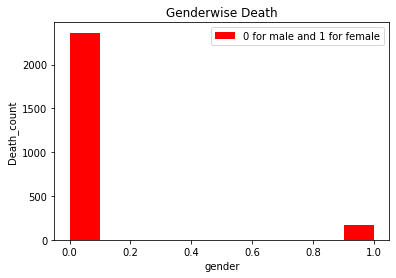

In [20]:
# histo plot
plt.hist(df1['death'],color="red",label=['0 for male and 1 for female'])
plt.title("Genderwise Death")
plt.xlabel("gender")
plt.ylabel("Death_count")
plt.legend()
plt.show()

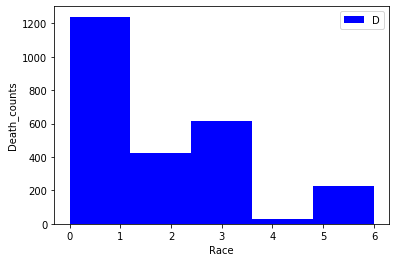

In [21]:
plt.hist(df1['racewise_death'],bins=5,color="blue")
plt.xlabel("Race")
plt.ylabel("Death_counts")

plt.legend("Death_counts")
plt.show()

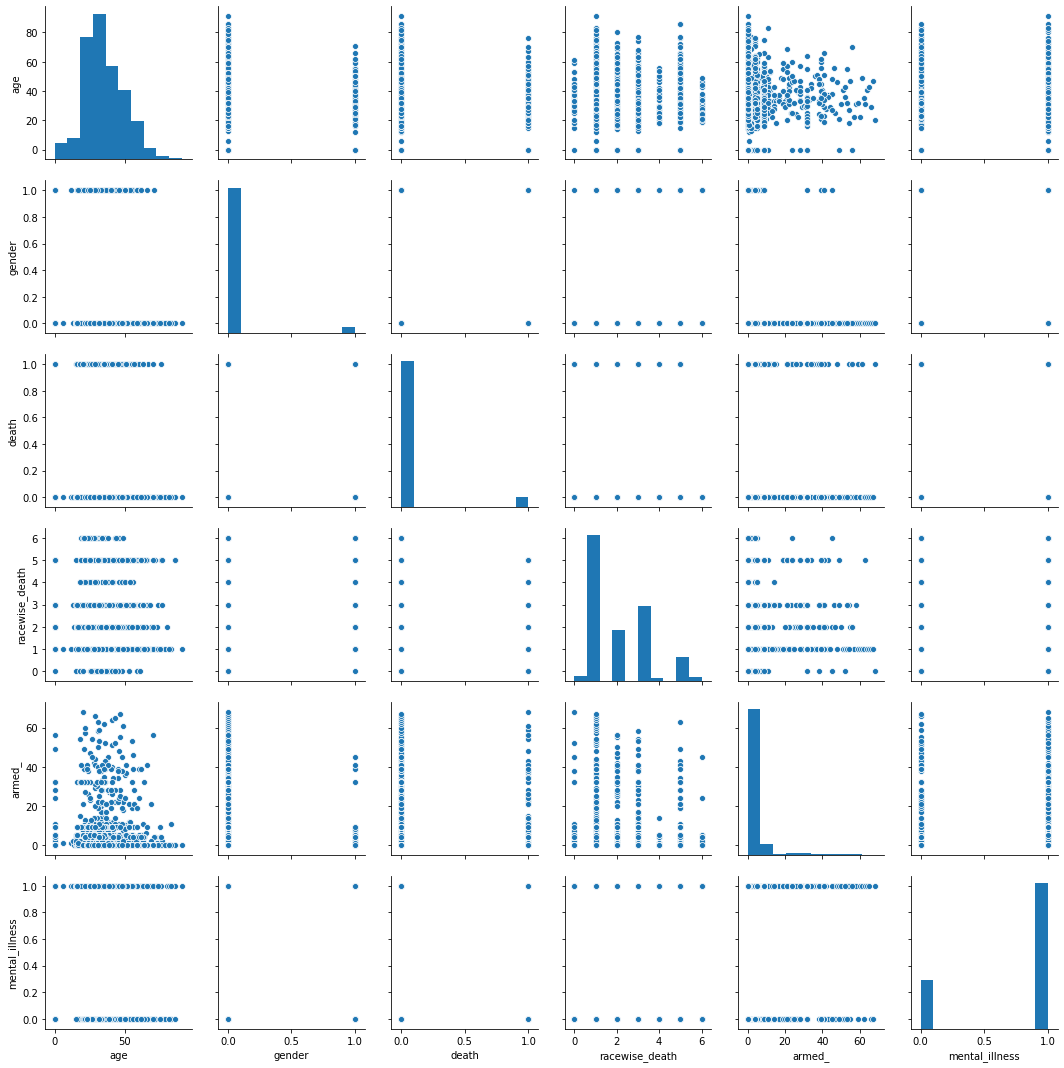

In [22]:
# pairplot to analyze the data structure
sns.pairplot(df1)

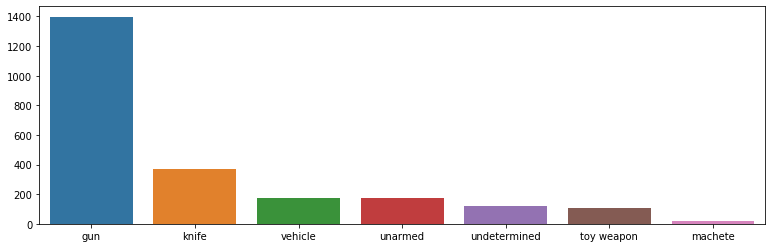

In [57]:
# plotting killed data based on armed
armed=df.armed.value_counts()
plt.figure(figsize=(13,4))
sns.barplot(x=armed[:7].index,y=armed[:7].values)

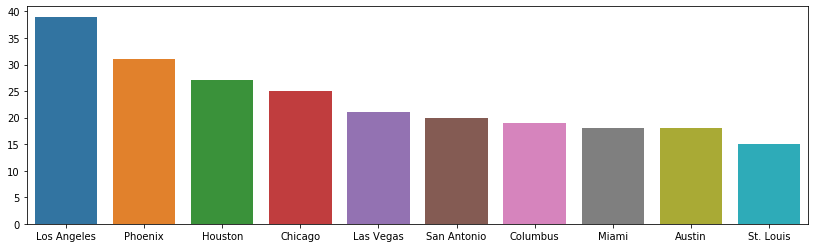

In [58]:
# top 10 most dangerous city
most_dangerous_city=df['city'].value_counts()
plt.figure(figsize=(14,4))
sns.barplot(x=most_dangerous_city[:10].index,y=most_dangerous_city[:10].values)
plt.show()

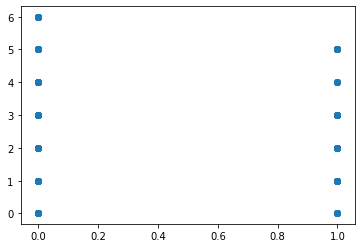

In [59]:
plt.scatter(df1['death'],df1['racewise_death'])

In [61]:
df1['date']

0       2/1/2015
1       2/1/2015
2       3/1/2015
3       4/1/2015
4       4/1/2015
          ...   
2530    28/07/17
2531    28/07/17
2532    29/07/17
2533    31/07/17
2534    31/07/17
Name: date, Length: 2535, dtype: object

In [65]:
df1['date']=pd.to_datetime(df1['date'])

In [66]:
df1.set_index('date',inplace=True)

In [70]:
death_2015=len(df1['2015']['death'])
death_2015

991

In [69]:
death_2016=len(df1['2016']['death'])
death_2016

963

In [78]:
death_2017=len(df1['2017']['death'])
death_2017

581

Text(0, 0.5, 'Death_counts')

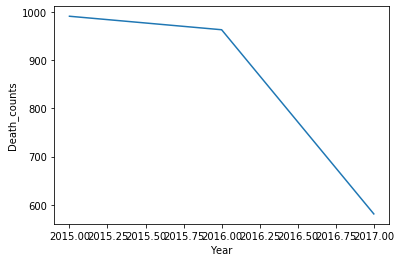

In [81]:
list_of_time=[2015,2016,2017]
list_of_death=[991,963,581]
plt.plot(list_of_time,list_of_death)
plt.xlabel("Year")
plt.ylabel("Death_counts")

In [85]:
# racewise death in 2015

white_2015=(df1['2015']['racewise_death']==1).sum()
black_2015=(df1['2015']['racewise_death']==3).sum()
print(white_2015)
print(black_2015)

495
258


In [88]:
# for 2016
white_2016=(df1['2016']['racewise_death']==1).sum()
black_2016=(df1['2016']['racewise_death']==3).sum()
print(white_2016)
print(black_2016)

465
233


In [89]:
# for 2017
white_2017=(df1['2017']['racewise_death']==1).sum()
black_2017=(df1['2017']['racewise_death']==3).sum()
print(white_2017)
print(black_2017)

241
127


In [91]:
# list of death of white from 2015 to 2017
white=[white_2015,white_2016,white_2017]
white

[495, 465, 241]

In [94]:
# list of death of black from 2015 to 2017
black=[black_2015,black_2016,black_2017]

Text(0, 0.5, 'white_death')

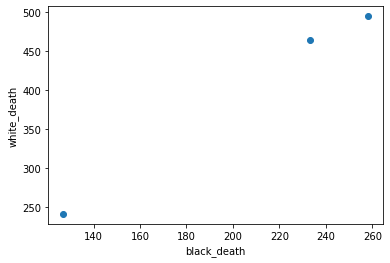

In [95]:
# plotting 
plt.scatter(black,white)
plt.xlabel("black_death")
plt.ylabel("white_death")

In [96]:
# it means each year white are killed more than black.

In [ ]:
# filtering the data which shows black and white death
df2=df1[(df1['racewise_death']==1) |(df1['racewise_death']==3)]
df2

In [146]:
# creating data for input and target
X=df2.drop(['racewise_death'],axis=1)
X

,age,gender,death,armed_,mental_illness
date,,,,,
2015-02-01,47.0,0,0,0,1
2015-04-01,32.0,0,0,2,0
2015-04-01,18.0,0,0,0,1
2015-06-01,35.0,0,0,0,1
2015-06-01,34.0,1,0,1,1
...,...,...,...,...,...
2017-07-25,16.0,0,0,9,1
2017-07-26,25.0,0,0,5,1
2017-07-27,39.0,0,0,0,1


In [147]:
Y=df2['racewise_death']
Y

date
2015-02-01    1
2015-04-01    1
2015-04-01    1
2015-06-01    1
2015-06-01    1
             ..
2017-07-25    3
2017-07-26    3
2017-07-27    3
2017-07-31    3
2017-07-31    3
Name: racewise_death, Length: 1819, dtype: int64

In [148]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)
# Yes we have splitted the data successfully

In [149]:
# lets train our model using train set of data
# Now we have to select the model
# Here i am going to linear vector machine or support vector machine which saperates the data with line or 
#linearly separate the data
from sklearn import svm
clf=svm.LinearSVC()
# lets train our model
clf.fit(X_train,Y_train)

C:\Users\pritam\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [158]:
# now lets make some prediction
# for single value
Y_pred=clf.predict(X_test)
# for multiple values
#print(clf.predict(X_test[0:10]))

In [159]:
# lets check accuracy of the model
print(clf.score(X_test,Y_test))

0.6905158069883528


In [161]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[392,   7],
       [179,  23]], dtype=int64)

In [164]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.69      0.98      0.81       399
           3       0.77      0.11      0.20       202

    accuracy                           0.69       601
   macro avg       0.73      0.55      0.50       601
weighted avg       0.71      0.69      0.60       601



In [168]:
# implementing more models to improve the prediction
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier()
# Train Decision Tree Classifer
model =model.fit(X_train,Y_train)

#cPredict the response for test dataset
y_pred_decision =model.predict(X_test)

In [170]:
print(model.score(X_test,Y_test))

0.6772046589018302


In [172]:
confusion_matrix(Y_test,y_pred_decision)

array([[322,  77],
       [117,  85]], dtype=int64)

In [173]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.69      0.98      0.81       399
           3       0.77      0.11      0.20       202

    accuracy                           0.69       601
   macro avg       0.73      0.55      0.50       601
weighted avg       0.71      0.69      0.60       601



In [211]:
# checking mode using actual data.
model.predict([[48,0,0,2,1]])


array([1], dtype=int64)

In [183]:
# plotting decision tree
def plot(x,y):
    plt.plot(x,y)


Decision Tree Plot For Model DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


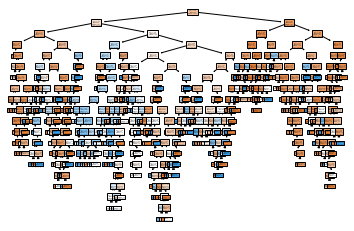

In [185]:
def plot(x):
    print("Decision Tree Plot For Model",x)
    tree.plot_tree(x,filled=True)
plot(model)

In [177]:
from sklearn import linear_model
lin=linear_model.LogisticRegression()
lin.fit(X_train,Y_train)

C:\Users\pritam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [178]:
y_pred_lin=lin.predict(X_test)

In [179]:
print(model.score(X_test,Y_test))

0.6772046589018302


In [180]:
confusion_matrix(Y_test,y_pred_lin)

array([[365,  34],
       [126,  76]], dtype=int64)

In [181]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.69      0.98      0.81       399
           3       0.77      0.11      0.20       202

    accuracy                           0.69       601
   macro avg       0.73      0.55      0.50       601
weighted avg       0.71      0.69      0.60       601



In [212]:
# Hence, i have used couple of model for better accuracy.

In [216]:
# Finally i have classified the death of the person based on the model but still struggeling to find whether death is biased 
# or not based on race? which parameter is responsible to answer the question? 
# please comment accordingly.I really need help. If i see only on the dataset, more whites have been killed than black so 
# there is no bias. But i think, this is not the right way to answer the probelm.


In [ ]:
# I am uploading this because of the feedback.I am sorry for the late post.